# Сборный проект
___

##### В данном исследовании представлена  таблица с информацией о продажах игр, содержащая:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг * компьютерных игр и присваивает им подходящую возрастную категорию.

###### Разднлим исследование на несколько частей:
##### Часть 1. Изучение общей информации:
* Откройте файл с данными и изучите общую информацию
##### Часть 2. Подготовка данных:
* Приведите к нижнему регистру
* Обработайте пропуски
* Преобразуйте данные в нужные типы
* Посчитайте суммарные продажи во всех регионах
##### Часть 3. Проведение исследовательского анализа данных:
* Посмотрите, сколько игр выпускалось в разные годы
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов
* Определите какие платформы лидируют по продажам, растут или падают
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
* Соотнесите выводы с продажами игр на других платформах
* Посмотрите на общее распределение игр по жанрам
##### Часть 4. Составьте портрет пользователя каждого региона:
* NA
* EU
* JP
##### Часть 5.  Проверьте гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Средние пользовательские рейтинги жанров Action и Sports
##### Часть 6. Напишите общий вывод
* Вывод

## Шаг 1. Откроем файл с данными и изучим общую информацию 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import display
import seaborn as sns

In [3]:
games = pd.read_csv('/datasets/games.csv')

In [4]:
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


## Вывод: 
просмотрев информацию видно следующие проблемы: не приведённые к нижнему регистру названия стобцов и значения столбцов со строчным типом, неправильные типы данных у столбцов `Year_of_Release` и `User_Score`.

## Шаг 2. Подготовим данные

### Заменим названия столбцов (приведём к нижнему регистру):

In [4]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Также приведём к нижнему регистру все строковые значения**:

In [5]:
games['name'] = games['name'].str.lower()
games['genre'] = games['genre'].str.lower()
games['platform'] = games['platform'].str.lower()

### Обработаем пропуски ('Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating') :

#### Посмотрим на пропуски в `'name'`

In [5]:
#games[games['name'] != games['name']]

Пропуски также есть почти в каждом атрибуте, поэтому удалим эти строки:

In [7]:
games.dropna(subset = ['name'], inplace = True)

#### Посмотрим на пропуски в `'year_of_release'`

In [6]:
#games[games['year_of_release'] != games['year_of_release']].head()

Замним пропуски на средние по названию игры, посмотрим сколько осталось после заполнения:

In [9]:
def filling_passes_median(row, atribut_condition, atribut_mean):

#логика функции - берём atribut_median в котором пропуск в строке row и заменяем его на средний по atribut_condition
    atributik_condition = row[atribut_condition]
    atributik = row[atribut_mean]
    
    if (atributik != atributik):
#        result = games[games[atribut_condition] == atributik_condition][atribut_mean].mean()      
        result = games[games[atribut_condition] == atributik_condition][atribut_mean].median()
    if (atributik != atributik):
        return result
    else:
        return atributik

In [10]:
games['year_of_release'] = games.apply(filling_passes_median, axis =1,atribut_mean = 'year_of_release', atribut_condition ='name') 
len(games[games['year_of_release'] != games['year_of_release']])

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


146

Оставшиеся заменим на средние по платформе:

In [11]:
games['year_of_release'] = games.apply(
    filling_passes_median, axis =1, atribut_mean= 'year_of_release', atribut_condition ='platform')

#### Посмотрим на пропуски в `'rating'`

In [7]:
#games[games['rating'] != games['rating']].head()

Заполним их модоой по имени там, где это возможно:

In [13]:
def filling_rating_top(row, atribut_top, atribut_condition):
    atributik_condition = row[atribut_condition]
    atributik_top = row[atribut_top]
    
    if (atributik_top != atributik_top):
        result = games[games[atribut_condition] == atributik_condition][atribut_top].describe()['top']   
        
    if (atributik_top != atributik_top):
        return result
    else:
        return atributik_top

In [14]:
games['rating'] = games.apply(
    filling_rating_top, axis =1, atribut_top= 'rating', atribut_condition ='name')

Оставшиеся пропуски в `rating` заменим значением **'unknown'**:

In [15]:
games['rating'].fillna('unknown');

#### Пропуски в ` 'critic_score'` и ` 'user_score'`

Также заменяем на среднее по имени для случаев, где это возможно, там где это не возможно - оставляем, как есть:

In [16]:
games['critic_score'] = games.apply(filling_passes_median, axis =1,atribut_condition ='name', atribut_mean ='critic_score')
len(games[games['critic_score'] != games['critic_score']])

7615

Проверим распределение `user_score` равных **'tbd'** по `year_of_release`, возможно ещё не определённые данные - данные последнего года, которые ещё не определили:

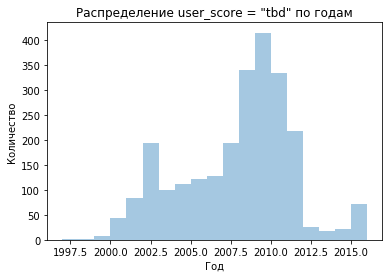

In [17]:
minimum = games[games['user_score'] == 'tbd']['year_of_release'].min()
maximum = games[games['user_score'] == 'tbd']['year_of_release'].max()
fig = sns.distplot(games[games['user_score'] == 'tbd']['year_of_release'], kde=False, bins = int(maximum - minimum));
fig.set(title = 'Распределение user_score = "tbd" по годам', ylabel = 'Количество', xlabel = 'Год');

Нет, с годом выпуска это не связано, возможно датасет склеивали из нескольких частей в одной из которых пропуски в `user_score` обрабатывались как **tbd**. Преобразуем его обратно в пропуск, чтобы было удобно работать:

In [18]:
games == games.replace('tbd', np.nan, inplace = True);

### Преобразуем данные в нужные типы для дальнейшей работы:

In [19]:
games['year_of_release'] = games['year_of_release'].astype('int')
games['user_score'] = pd.to_numeric(games['user_score'])

Проверим результат:

In [20]:
print(games['year_of_release'].dtype)
print(games['user_score'].dtype) 

int64
float64


In [21]:
games['user_score'] = games.apply(filling_passes_median, axis =1,atribut_condition ='name', atribut_mean ='user_score')

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [22]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Проверим, как всё прошло:

In [23]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       9098 non-null float64
user_score         8689 non-null float64
rating             10386 non-null object
total_sales        16713 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


## Вывод:
в целях исключения дальнейших ошибок мы **привели к нижнему регистру** названия столбцов и все строчные значения датафрейма, **преобразовали в нужные типы** необходимые столбцы (`year_of_release` и `user_score`), **избавились от пропусков** (везде кроме оценки критиков и пользователей, поскольку эти пропуски мы не можем предобработать) и **посчитали суммарные продажи** во всех регионах).

## Шаг 3. Проведём исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Определим важны ли данные за все периоды:

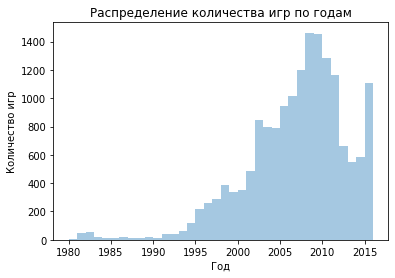

In [24]:
minimum = games['year_of_release'].min()
maximum = games['year_of_release'].max()
fig = sns.distplot(games['year_of_release'], kde=False, bins = maximum - minimum);
fig.set(title = 'Распределение количества игр по годам', ylabel = 'Количество игр', xlabel = 'Год');

Количество игр, выпущенных по годам растёт экспоненциально вплоть до 2011 года (с некоторыми пиками в 1998 и 2004 гг.), затем уменьшается почти в 4 раза и вновь начинает расти вплоть до 2016). За период 1980-1995 было выпущенно сравнительно мало игр, данные за этот период можно считать не важными, хотя вопрос конечно поставлен некоректно, всё зависит от поставленной задачи.

### Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы:

In [25]:
top_10_platforms = games.groupby('platform')[['total_sales']].sum().sort_values(by = 'total_sales', ascending = False).head(10).reset_index()
top_10_platforms

,platform,total_sales
0,ps2,1255.77
1,x360,971.42
2,ps3,939.65
3,wii,907.51
4,ds,806.12
5,ps,730.86
6,gba,317.85
7,ps4,314.14
8,psp,294.05
9,pc,259.52


Превратим столбец платформ в список и построим распределения платформ по годам с помощью цикла **for**:

In [26]:
top_10_platforms_list = list(top_10_platforms['platform'])

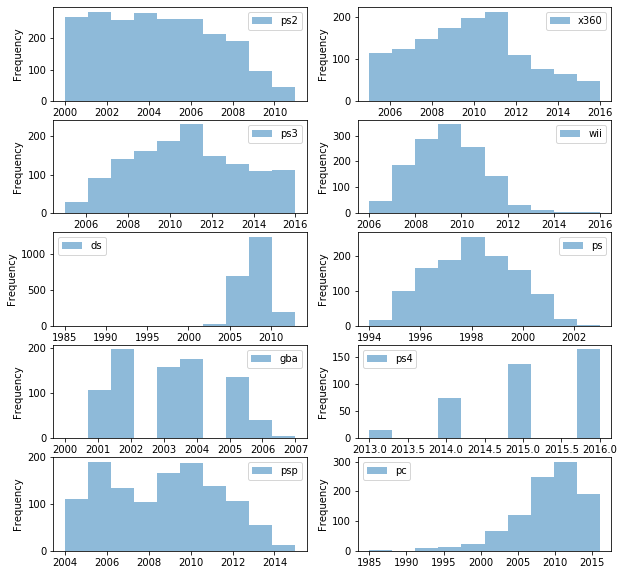

In [27]:
for i in range(len(top_10_platforms_list)):
    plt.subplot(5, 2 , i+1)
    games[ games ['platform'] == top_10_platforms_list[i] ]['year_of_release'].plot(
        kind ='hist' , alpha = 0.5, figsize = (10,10), label = top_10_platforms_list[i], legend = top_10_platforms_list[i]);

Характерный **срок жизни** платформы - **10 лет**

In [28]:
characteristic_time = 10

### Для дальнейшей работы отбросим данные, не входящии в соответствующий актуальный период.

Актуальным назовём период с 2012 года, тогда платформы на которые уже перестали выходить игры не будут входить в датасет.

In [29]:
games = games[games['year_of_release'] >= 2012]
games['year_of_release'].min()

2012

### Посмотрим на общее распределение игр по жанрам. Определим самые прибыльные жанры? Узнаем выделяются ли жанры с высокими и низкими продажами:

Для чистоты наблюдения посчитаем также количество игр по жанрам и их соотношение к продажам:

In [30]:
top_genres = games.groupby('genre')[['total_sales']].sum().sort_values(by = 'total_sales' , ascending = False).reset_index()
genres = list(top_genres['genre'])

def games_count(row):
    genre = row['genre']
    return len(games [games['genre'] == genre])

top_genres['games_counts'] = top_genres.apply(games_count, axis =1) 

In [31]:
top_genres['mean_sales'] = top_genres['total_sales'] / top_genres['games_counts']
top_genres

,genre,total_sales,games_counts,mean_sales
0,action,446.41,1041,0.428828
1,shooter,304.82,238,1.280756
2,role-playing,193.09,372,0.519059
3,sports,181.07,268,0.675634
4,misc,85.28,193,0.441865
5,platform,61.00,85,0.717647
6,racing,53.59,116,0.461983
7,fighting,44.49,109,0.408165
8,simulation,35.31,81,0.435926
9,adventure,29.52,303,0.097426


**Самыми прибыльными** жанрами оказались `'action'`, `'sports'`,`'shooter'`,`'misc'`,`'role-playing'`.<br>
Жанры с **самыми высокими средними** продажами - `'shooter'`, `'platform'`<br>
Жанры с **самыми низкими средними** продажами - `'adventure'`, `'puzzle'`

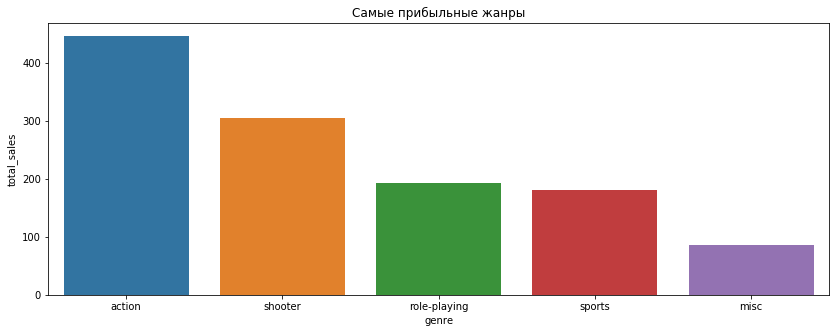

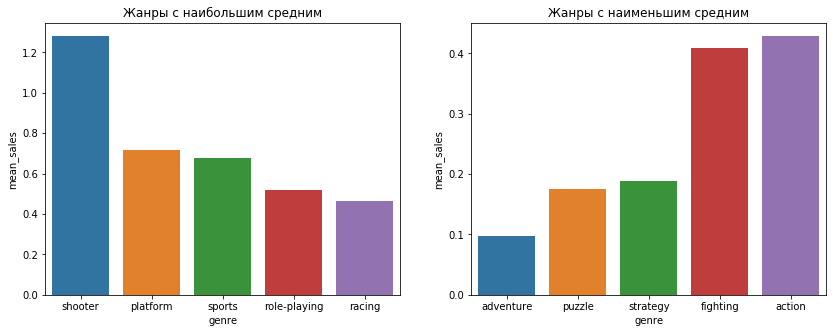

In [32]:
top_genres = top_genres.sort_values(by = 'total_sales' , ascending = False).reset_index(drop=True)
ax = plt.figure(figsize = (14,5))
ax = sns.barplot(x = top_genres.loc[0:4,'genre'], y = top_genres['total_sales']);
ax.set_title('Самые прибыльные жанры');

fig = plt.subplots(1, 3, figsize=(14, 5));

plt.subplot(121);
top_genres = top_genres.sort_values(by = 'mean_sales' , ascending = False).reset_index(drop=True)
ax = sns.barplot(x = top_genres.loc[0:4,'genre'], y = top_genres['mean_sales']);
ax.set_title('Жанры с наибольшим средним');

plt.subplot(122);
top_genres = top_genres.sort_values(by = 'mean_sales' , ascending = True).reset_index(drop=True)
ax = sns.barplot(x = top_genres.loc[0:4,'genre'], y = top_genres['mean_sales']);
ax.set_title('Жанры с наименьшим средним');


### Определим какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ:

Вновь воспользуемся данной сводной таблицей:

In [33]:
top_platforms = games.groupby('platform')[['total_sales']].sum().sort_values(by = 'total_sales' , ascending = False).reset_index()
top_platforms 

,platform,total_sales
0,ps4,314.14
1,ps3,289.71
2,x360,237.52
3,3ds,195.48
4,xone,159.32
5,wiiu,82.19
6,pc,63.51
7,psv,49.44
8,wii,36.60
9,ds,13.21


In [34]:
top_platforms =  list(top_platforms['platform'])

Вновь псмотрим на распределения:

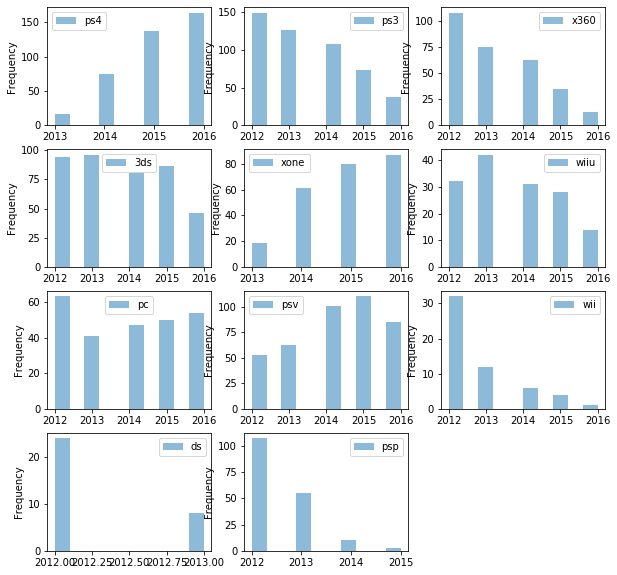

In [35]:
for i in range(len(top_platforms)):
    plt.subplot(4, 3 , i+1)
    games[ games ['platform'] == top_platforms[i] ]['year_of_release'].plot(
        kind ='hist' , alpha = 0.5, figsize = (10,10), label = top_platforms[i], legend = top_platforms[i]);

**Растущими и соответственно потенциально прибыльными оказались 3 платформы: `ps4`, `pc`, `xone`.** <br>
Отдельно построим их распределения:

In [36]:
rising_platforms = ['pc','ps4','xone']

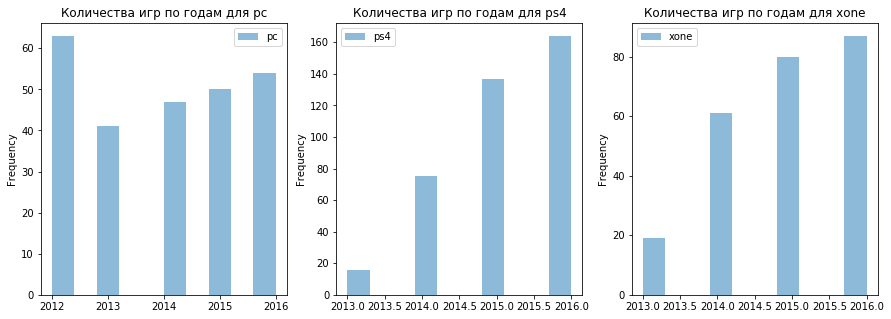

In [37]:
for i in range(len(rising_platforms)):
    plt.subplot(1, 3 , i+1)
    games[ games ['platform'] == rising_platforms[i] ]['year_of_release'].plot(
        kind ='hist' , alpha = 0.5, figsize = (15,5), label = rising_platforms[i], legend = top_platforms[i]);
    plt.title('Количества игр по годам для {}'.format(rising_platforms[i]))

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам и опишем результат:

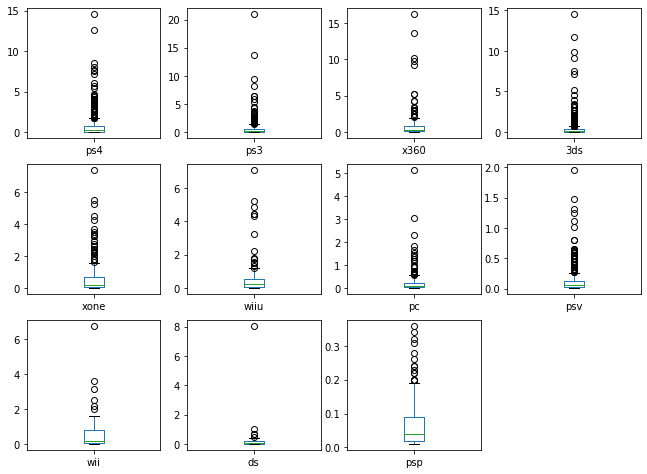

In [38]:
for i in range(len(top_platforms)):
    plt.subplot(4, 4, i+1)
    games[ games ['platform'] == top_platforms[i]] ['total_sales'].plot(
        kind ='box' , figsize = (11,11), label = top_platforms[i], legend = top_platforms[i]);

Нижний ряд графиков характерен для платформ с малыми продажами, имеющих мало выбросов. 2 Верхних ряда характеризуются малыми квартильными значениями и большим количеством выбросов превосходящих медиану в десятки раз, на эти платформы невыдающихся игр выходит много, но также есть и несколько десятков шедевров игровой индустрии)

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы:

Возьмём  `ps3` для примера:

In [39]:
ps3_games = games[games['platform'] == 'ps3']

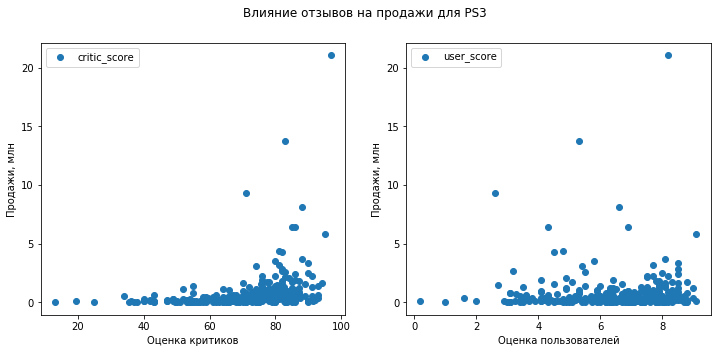

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(ps3_games['critic_score'], ps3_games['total_sales'], label="critic_score");
axs[0].legend();
axs[0].set_xlabel('Оценка критиков')
axs[0].set_ylabel('Продажи, млн')
axs[1].scatter(ps3_games['user_score'], ps3_games['total_sales'], label = "user_score");
axs[1].legend();
axs[1].set_xlabel('Оценка пользователей')
axs[1].set_ylabel('Продажи, млн')
fig.suptitle('Влияние отзывов на продажи для PS3');

In [41]:
print('Корреляция между отзывами критиков и продажами для ps3: ',ps3_games.corr()['critic_score']['total_sales'])
print('Корреляция между отзывами пользователей и продажами для ps3: ',ps3_games.corr()['user_score']['total_sales'])

Корреляция между отзывами критиков и продажами для ps3:  0.306494990902795
Корреляция между отзывами пользователей и продажами для ps3:  0.008907920000339783


*По диаграмме рассеяния видно, что от оценки критиков продажи зависят больше чем от оценки пользователей. От оценки критиков продажи зависят слабо, но от оценки пользователей не зависят вовсе.*

### Соотнесём выводы с продажами игр на других платформах:

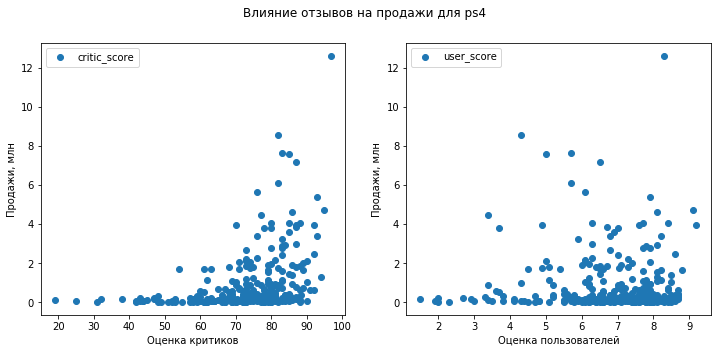

Корреляция между отзывами критиков и продажами для ps4:  0.3908899363117354
Корреляция между отзывами пользователей и продажами для :  -0.02086201340247836


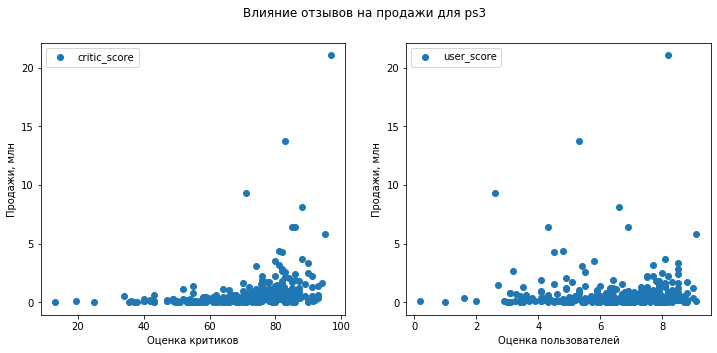

Корреляция между отзывами критиков и продажами для ps3:  0.306494990902795
Корреляция между отзывами пользователей и продажами для :  0.008907920000339783


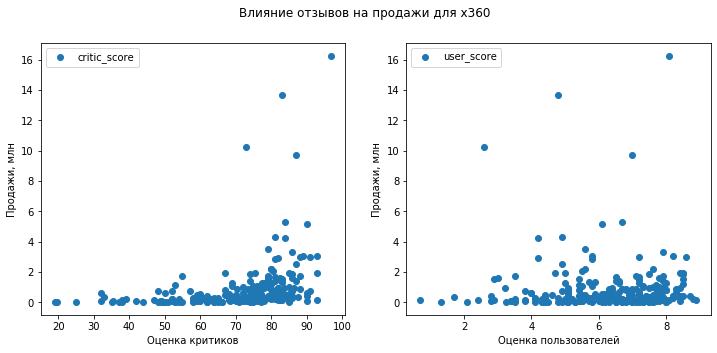

Корреляция между отзывами критиков и продажами для x360:  0.3228499026406916
Корреляция между отзывами пользователей и продажами для :  0.012318156665725414


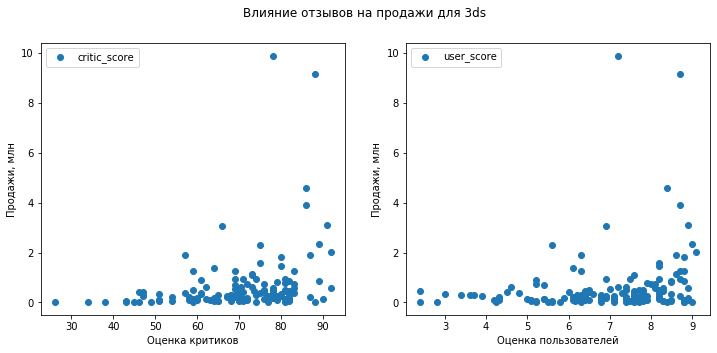

Корреляция между отзывами критиков и продажами для 3ds:  0.2929240211339423
Корреляция между отзывами пользователей и продажами для :  0.21728655826520762


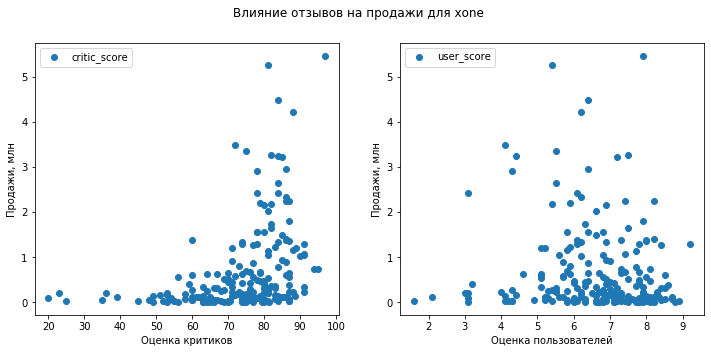

Корреляция между отзывами критиков и продажами для xone:  0.3743835104785387
Корреляция между отзывами пользователей и продажами для :  -0.09647011599165731


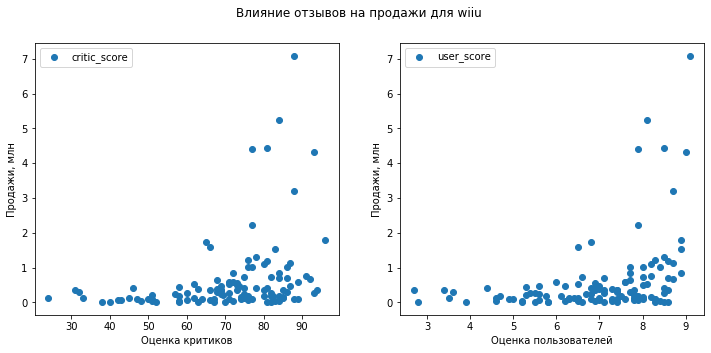

Корреляция между отзывами критиков и продажами для wiiu:  0.3246244117079106
Корреляция между отзывами пользователей и продажами для :  0.3666313714082165


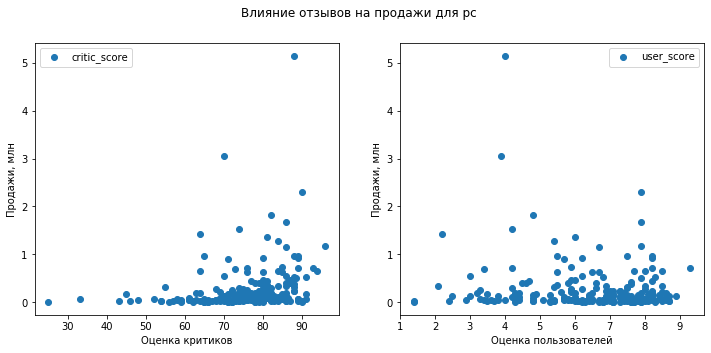

Корреляция между отзывами критиков и продажами для pc:  0.23521267809174495
Корреляция между отзывами пользователей и продажами для :  -0.12623537308710273


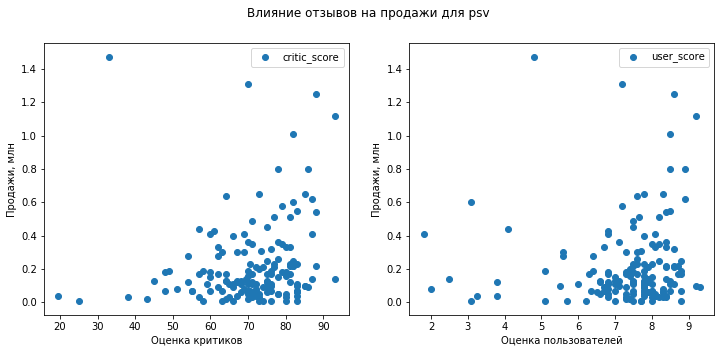

Корреляция между отзывами критиков и продажами для psv:  0.1570982447166102
Корреляция между отзывами пользователей и продажами для :  0.055047682904474426


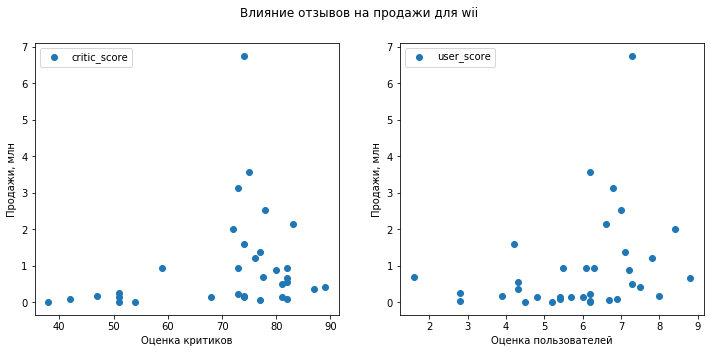

Корреляция между отзывами критиков и продажами для wii:  0.23987420951930813
Корреляция между отзывами пользователей и продажами для :  0.2983497769262746


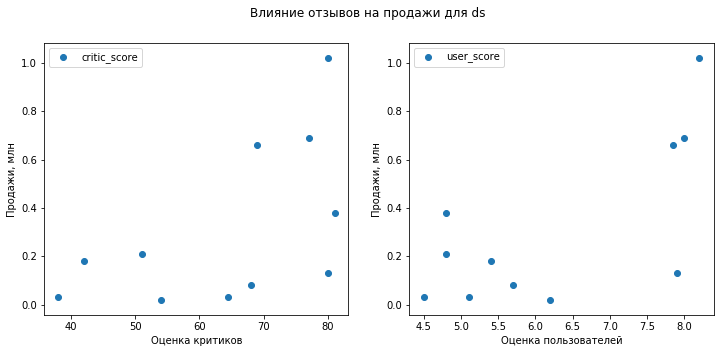

Корреляция между отзывами критиков и продажами для ds:  0.5646895666734469
Корреляция между отзывами пользователей и продажами для :  0.6900716886481102


In [42]:
for i in range(len(top_platforms)-1):
    games_in_platform = games[games['platform'] == top_platforms[i]]
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].scatter(games_in_platform['critic_score'], games_in_platform['total_sales'], label="critic_score");
    axs[0].legend();
    axs[0].set_xlabel('Оценка критиков')
    axs[0].set_ylabel('Продажи, млн')
    axs[1].scatter(games_in_platform['user_score'], games_in_platform['total_sales'], label = "user_score");
    axs[1].legend();
    axs[1].set_xlabel('Оценка пользователей')
    axs[1].set_ylabel('Продажи, млн')
    fig.suptitle('Влияние отзывов на продажи для {}'.format(top_platforms[i]));
    plt.show();
    print('Корреляция между отзывами критиков и продажами для {}: '.format(top_platforms[i]) ,games_in_platform.corr()['critic_score']['total_sales'])
    print('Корреляция между отзывами пользователей и продажами для : '.format(top_platforms[i]) ,games_in_platform.corr()['user_score']['total_sales'])

### Вывод:
Для всех платформ оценки критиков влияют на продажи больше чем оценки пользователей (кроме `ds` и `wiiu`). Однако, в большинстве случаях корреляция низкая. Во всех случаях корреляции положительны (либо очень слабо отрицательны) кроме случая с `pc` и `xone`, почему то там прослеживаются отрицательные корреляции продаж от оценок пользователей.

## Шаг 4. Составим портрет пользователя каждого региона
### Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишем различия в долях продаж
* Самые популярные жанры (топ-5). Поясним разницу
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

##  NA

### Выясним самые популярные платформы для пользователей Северной Америки:

In [43]:
na_platforms = games.groupby('platform')[['na_sales']].sum().sort_values(by = 'na_sales' , ascending = False).reset_index()

In [44]:
other_platform_sales = 0
for i  in range(5,len(na_platforms)):
    other_platform_sales += na_platforms.loc[i,'na_sales']
other_platform_sales

91.75000000000003

In [45]:
na_platforms = na_platforms.loc[:4,:]
na_platforms.loc[5] = {'platform': 'other', 'na_sales': other_platform_sales}
na_platforms

,platform,na_sales
0,x360,140.57
1,ps4,108.74
2,ps3,103.74
3,xone,93.12
4,3ds,55.87
5,other,91.75


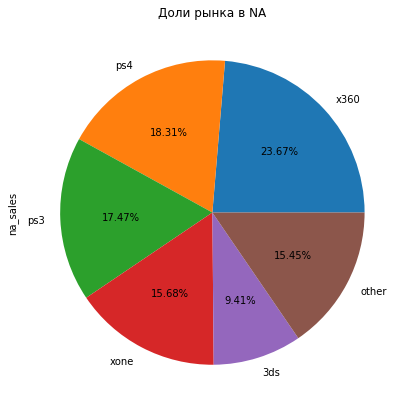

In [46]:
na_platforms['na_sales'].plot(kind = 'pie', labels = na_platforms['platform'], figsize = (9,7), autopct ='%1.2f%%', title = 'Доли рынка в NA');

Лидирует `x360` c 23.67% долей рынка, за ним идут `ps4` c 18.31%, `ps3` c 17.47%, `xone` c 15.68% и `3ds` с её 9.41%. **Остальные платформы** суммарно набирают 15.45%.

### Выясним ТОП 5 жанров  для пользователей Северной Америки:

In [47]:
na_genres = games.groupby('genre')[['na_sales']].sum().sort_values(by = 'na_sales' , ascending = False).reset_index()

In [48]:
other_genres_sales = 0
for i  in range(5,len(na_genres)):
    other_genres_sales += na_genres.loc[i,'na_sales']

In [49]:
na_genres = na_genres.loc[:4,:]
na_genres.loc[5] = {'genre': 'other', 'na_sales': other_genres_sales}
na_genres

,genre,na_sales
0,action,180.15
1,shooter,144.83
2,sports,81.53
3,role-playing,64.11
4,misc,38.19
5,other,84.98


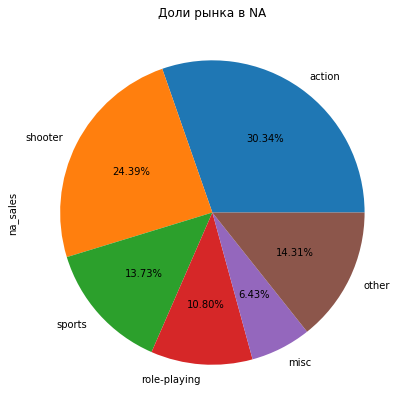

In [50]:
na_genres['na_sales'].plot(kind = 'pie', labels = na_genres['genre'], figsize = (9,7), autopct ='%1.2f%%', title = 'Доли рынка в NA');

Лидирует жанр `action` c 30.34% долей рынка, за ним идут `shooter` c 24.39%, `sports` c 13.73%, `role-playing` c 10.8% и `misc` с 6.43%. **Остальные жанры** суммарно набирают 14.31%.

### Узнаем влияет ли рейтинг ESRB на продажи в NA:

In [51]:
na_rating = games.groupby('rating')[['na_sales']].median().sort_values(by = 'na_sales' , ascending = False).reset_index()

,rating,na_sales
0,M,0.14
1,E10+,0.13
2,E,0.07
3,T,0.05


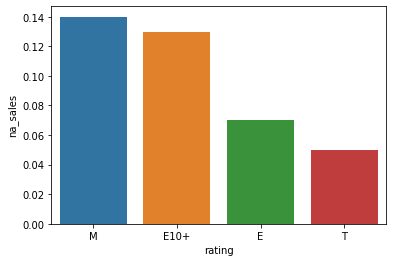

In [52]:
display(na_rating)
sns.barplot(x = na_rating['rating'], y = na_rating['na_sales']);

### Вывод: 
Для пользователей Северной Америки предпочтительными платформами являются: `x360`, `ps4`, `ps3`, `xone` и `3ds`. Приоритетные жанры игр: `action`, `shooter`, `sports`, `misc` и  `role-playing`. Наибольшие продажи показывают игры с рейтингами `M`, `E` и `T`.

##  EU

### Выясним самые популярные платформы для Европейского пользователя:

In [53]:
eu_platforms = games.groupby('platform')[['eu_sales']].sum().sort_values(by = 'eu_sales' , ascending = False).reset_index()

In [54]:
other_platform_sales = 0
for i  in range(5,len(eu_platforms)):
    other_platform_sales += eu_platforms.loc[i,'eu_sales']

In [55]:
eu_platforms = eu_platforms.loc[:4,:]
eu_platforms.loc[5] = {'platform': 'other', 'eu_sales': other_platform_sales}
eu_platforms

,platform,eu_sales
0,ps4,141.09
1,ps3,107.27
2,x360,74.89
3,xone,51.59
4,3ds,42.85
5,other,91.56


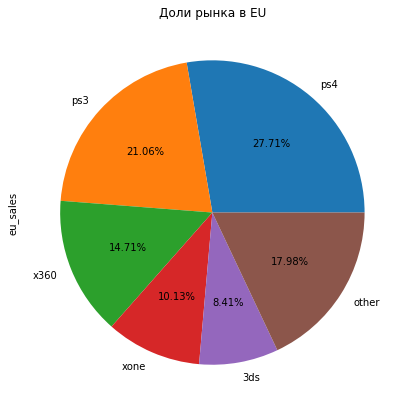

In [56]:
eu_platforms['eu_sales'].plot(kind = 'pie', labels = eu_platforms['platform'], figsize = (9,7), autopct ='%1.2f%%', title = 'Доли рынка в EU');

Лидирует `ps4` c 27.71% долей рынка, за ним идут `PS3` c 21.06%, `x360` c 14.71%, `xone` c 10.13% и `3ds` с её 8.41%. **Остальные платформы** суммарно набирают 17.98%.

### Выясним ТОП 5 жанров для Европейского пользователя:

In [57]:
eu_genres = games.groupby('genre')[['eu_sales']].sum().sort_values(by = 'eu_sales' , ascending = False).reset_index()

In [58]:
other_genres_sales = 0
for i  in range(5,len(eu_genres)):
    other_genres_sales += eu_genres.loc[i,'eu_sales']

In [59]:
eu_genres = eu_genres.loc[:4,:]
eu_genres.loc[5] = {'genre': 'other', 'eu_sales': other_genres_sales}
eu_genres

,genre,eu_sales
0,action,161.70
1,shooter,113.49
2,sports,69.09
3,role-playing,48.58
4,racing,27.29
5,other,89.10


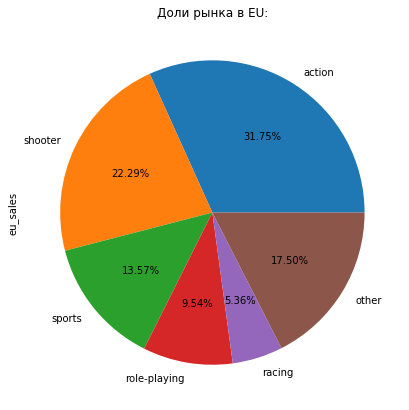

In [60]:
eu_genres['eu_sales'].plot(kind = 'pie', labels = eu_genres['genre'], figsize = (9,7), autopct ='%1.2f%%', title = 'Доли рынка в EU:');

Лидирует жанр `action` c 31.75% долей рынка, за ним идут `shooter` c 22.29%, `sports` c 11.57%, `role-playing` c 9.54% и `racing` с 5.36%. **Остальные жанры** суммарно набирают 17.5%.

### Узнаем влияет ли рейтинг ESRB на продажи в EU:

In [61]:
eu_rating = games.groupby('rating')[['eu_sales']].median().sort_values(by = 'eu_sales' , ascending = False).reset_index()

,rating,eu_sales
0,M,0.13
1,E10+,0.11
2,E,0.06
3,T,0.04


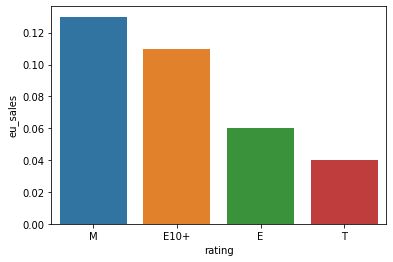

In [62]:
display(eu_rating)
sns.barplot(x = eu_rating['rating'], y = eu_rating['eu_sales']);

### Вывод:
Для пользователей Европы предпочтительными платформами являются: `ps4`, `ps3`, `x360`, `xone` и `3ds`. Приоритетные жанры игр: `action`, `shooter`, `sports`, `role-playing` и `racing`. Наибольшие продажи показывают игры с рейтингами `M`, `E10+` и `E`.

## JP

### Выясним самые популярные платформы для Японского пользователя:

In [63]:
jp_platforms = games.groupby('platform')[['jp_sales']].sum().sort_values(by = 'jp_sales' , ascending = False).reset_index()

In [64]:
other_platform_sales = 0
for i  in range(5,len(jp_platforms)):
    other_platform_sales += jp_platforms.loc[i,'jp_sales']

In [65]:
jp_platforms = jp_platforms.loc[:4,:]
jp_platforms.loc[5] = {'platform': 'other', 'jp_sales': other_genres_sales}
jp_platforms

,platform,jp_sales
0,3ds,87.82
1,ps3,35.29
2,psv,21.11
3,ps4,15.96
4,wiiu,13.01
5,other,89.10


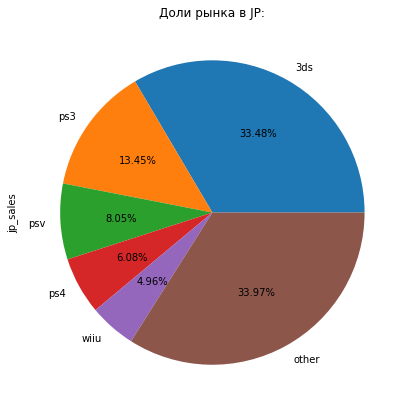

In [66]:
jp_platforms['jp_sales'].plot(kind = 'pie', labels = jp_platforms['platform'], figsize = (9,7), autopct ='%1.2f%%', title = 'Доли рынка в JP:');

Лидирует `3ds` c 33.48% долей рынка, за ним идут `ps3` c 13.45%, `psv` c 8.05%, `ps4` c 6.08% и `wiiu` с её 4.96%. **Остальные платформы** суммарно набирают 33.97%.

### Выясним ТОП 5 жанров для Японского пользователя:

In [67]:
jp_genres = games.groupby('genre')[['jp_sales']].sum().sort_values(by = 'jp_sales' , ascending = False).reset_index()

In [68]:
other_genres_sales = 0
for i  in range(5,len(jp_genres)):
    other_genres_sales += jp_genres.loc[i,'jp_sales']

In [69]:
jp_genres = jp_genres.loc[:4,:]
jp_genres.loc[5] = {'genre': 'other', 'jp_sales': other_genres_sales}
jp_genres

,genre,jp_sales
0,role-playing,65.54
1,action,52.80
2,misc,13.10
3,simulation,10.41
4,fighting,9.44
5,other,41.63


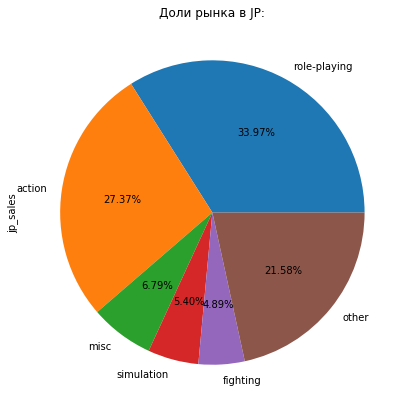

In [70]:
jp_genres['jp_sales'].plot(kind = 'pie', labels = jp_genres['genre'], figsize = (9,7), autopct ='%1.2f%%', title = 'Доли рынка в JP:');

Лидирует жанр `role-playing` c 33.97% долей рынка, за ним идут `action` c 27.37%, `misc` c 6.79%, `simulation` c 5.4% и `fighting` с 4.89%. **Остальные жанры** суммарно набирают 21.58%.

### Узнаем влияет ли рейтинг ESRB на продажи в JP:

In [71]:
jp_rating = games.groupby('rating')[['jp_sales']].sum().sort_values(by = 'jp_sales' , ascending = False).reset_index()
display(jp_rating)

,rating,jp_sales
0,E,29.27
1,T,29.20
2,M,22.59
3,E10+,8.57


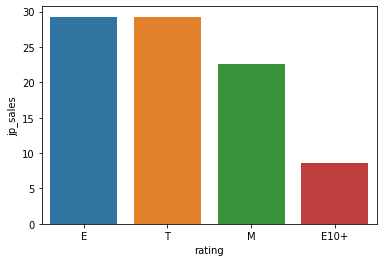

In [72]:
sns.barplot(x = jp_rating['rating'], y = jp_rating['jp_sales']);

### Вывод:
Для пользователей Японии предпочтительными платформами являются: `3ds`, `ps3`, `psv`, `ps4` и `wiiu`. Предпочтения по платформам Европейцев и Североамериканцев практически идентичны, в то время, как у Японцев они различаются из-за того, что Nintendo и Sony - японские компании в их устройства они и играют. <br>
Приоритетные жанры игр у Японцев: `role-playing	`, `action`, `misc`, `simulation` и `fighting`. Также заметно различие с пользователями континентов, т.к. последние предпочитают `action`, `shooter`, `sports`, `role-playing`. <br>
Наибольшие продажи показывают игры с рейтингами `E`, `T` и `M` и, что отличает Японский рынок от рынка континентов, игры с рейтингом `E` и `T` продаются почти поровну. <br>

## Шаг 5. Проверим гипотезы

* Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые; 
* Средние пользовательские рейтинги жанров `Action` и `Sports` разные.

### Для первого случая сформулируем нулевую и альтернативную гипотезы:
(Нулевая гипотеза выбирается так, чтобы в условии было равенство)<br>

**Нулевая гипотеза**: средние пользовательские рейтинги платформ `Xbox One` и `PC` равны; <br>
**Альтернативная гипотеза**: средние пользовательские рейтинги платформ `Xbox One` и `PC` различны; <br>
Проверяем:

Сделаем таблицы для игр на **ПК** и **XBOX ONE**:

In [73]:
xbox_one = games[ games['platform'] == 'xone']
pc = games[ games['platform'] == 'pc']

Определим средние значения `user_score` методом **describe()** и построим гистограмму распределния:

In [74]:
print('Средняя пользовательская оценка для игр xbox_one:', xbox_one['user_score'].describe()['mean'])
print('Средняя пользовательская оценка для игр pc:', pc['user_score'].describe()['mean'])

Средняя пользовательская оценка для игр xbox_one: 6.617233009708738
Средняя пользовательская оценка для игр pc: 6.45


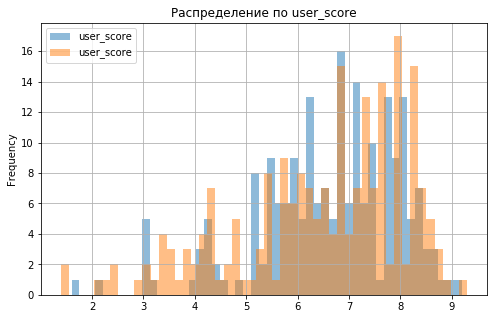

In [75]:
st = 'Распределение по user_score'  
x = xbox_one['user_score']
y = pc['user_score']
x.plot(kind ='hist', legend ='xbox_one', grid = True, alpha = 0.5, figsize = (8,5), bins = 50);
y.plot(kind ='hist', legend ='pc', grid = True, alpha = 0.5 , title = st, bins = 50);

**Перед проверкой гипотезы проверим дисперсии выборок, чтобы корректно определить атрибут equal_val в Т–тесте.**

In [76]:
print('Дисперсия для пользовательскаой оценки игр xbox_one:', np.var(xbox_one['user_score']))
print('Дисперсия для пользовательскаой оценки игр рс:', np.var(pc['user_score']))

Дисперсия для пользовательскаой оценки игр xbox_one: 1.884496712696767
Дисперсия для пользовательскаой оценки игр рс: 2.757790697674418


<div class="alert alert-block alert-warning">
<h2>Комментарий от ревьювера (принимаем к размышлению)</h2> 
    
Все верно, ошибки нет. ВИжу, что знаешь как связаны дисперсия и стандартное отклонение. Тем не менее, для нахождения дисперсии лучше использовать np.var().
</div>

In [77]:
xbox_one_sample = xbox_one['user_score'].dropna()
pc_sample = pc['user_score'].dropna()
from scipy import stats as st
# наблюдение достаточно много примем alpha = 0,01
alpha = .01
results = st.ttest_ind(
    xbox_one_sample, 
    pc_sample)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу о равенстве средних пользовательских оценок")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.26296107136470476
Не получилось отвергнуть нулевую гипотезу


Не получается отвергнуть гипотезу о равенстве средних оценок для  игр на `Xbox One` и `PC`. Полученое значение говорит о том, что хотя средние и неодинаковы, такой результат можно получить случайно с вероятностью в 26%.

### Для второго случая сформулируем нулевую и альтернативную гипотезы:
(Нулевая гипотеза выбирается так, чтобы в условии было равенство)<br>

**Нулевая гипотеза**: средние пользовательские рейтинги жанров `Action` и `Sports` равны; <br>
**Альтернативная гипотеза**: средние пользовательские рейтинги жанров `Action` и `Sports` различны; <br>
Проверяем:

Сделаем таблицы для игр жанров **Action** и **Sports**:

In [78]:
action = games[ games['genre'] == 'action']
sports = games[ games['genre'] == 'sports']

Определим средние значения `user_score` методом **describe()** и построим гистограмму распределния:

In [79]:
print('Средняя пользовательская оценка для игр жанра "action":', action['user_score'].describe()['mean'])
print('Средняя пользовательская оценка для игр жанра "sports":', sports['user_score'].describe()['mean'])

Средняя пользовательская оценка для игр жанра "action": 6.871311475409836
Средняя пользовательская оценка для игр жанра "sports": 5.413348416289592


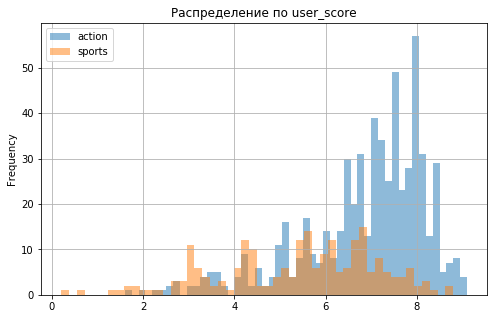

In [80]:
st = 'Распределение по user_score'  
x = action['user_score']
y = sports['user_score']
x.plot(label = 'action', kind ='hist', legend ='action', grid = True, alpha = 0.5, figsize = (8,5), bins = 50);
y.plot(label = 'sports', kind ='hist', legend ='sports', grid = True, alpha = 0.5 , title = st, bins = 50);

In [81]:
print('Дисперсия для пользовательскаой оценки игр жанра "action":', action['user_score'].describe()['std']**2)
print('Дисперсия для пользовательскаой оценки игр жанра "sports":', sports['user_score'].describe()['std']**2)

Дисперсия для пользовательскаой оценки игр жанра "action": 1.8773119061078365
Дисперсия для пользовательскаой оценки игр жанра "sports": 2.90019600987248


In [82]:

alpha = .05
from scipy import stats as st
action_sample = action['user_score'].dropna()
sports_sample = sports['user_score'].dropna()
results = st.ttest_ind(
    action_sample, 
    sports_sample)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу о равенстве средних пользовательских оценок")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.532719929179447e-34
Отвергаем нулевую гипотезу о равенстве средних пользовательских оценок


Для выбранного уровня значимости нулевая гипотеза отвергнута -> средние пользовательские рейтинги жанров оценка не равны,. p-значение оказалось настолько малым, что даже задав значение **alpha** меньше на несколько порядков результат не изменится.

## Вывод:
мы проверили статистическую гипотезу о разности средних пользовательских рейтингов платформ `Xbox One` и `PC`: оказалось, что мы не можем отвергнуть гипотезу о том, что средние оценки равны. <br>
Гипотезу о равенстве средних пользовательских рейтингов жанров `Action` и `Sports` мы уверенно отвергаем.

## Шаг 6. Напишем общий вывод

---Шаг 1---
* Мы открыли файл, содержащий информацию о продажах игр разных жанров, на разные платформы и в разных регионах. Выявили следующие ошибки в датафрейме: неприведённые к нижнему регистру названия столбцов и значения, несоответствующие типы данных, пропуски;

---Шаг 2---
* Привели названия столбцов и строчные атрибуты к нижнему регистру, обработали пропуски (где это было возможно) в **'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score' и 'Rating'**, изменили тип `'year_of_release'` (float64 -> int64) и `'user_score'` (object -> float64);
* Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец `'total_sales'`;

---Шаг 3---
* Посмотрели, на распределение игр по годам, выяснили, что количество игр, выпущенных по годам **растёт экспоненциально** вплоть до 2011 года (с выбивающимся пиком в 2004 г.), затем уменьшается почти в 4 раза и вновь начинает расти вплоть до 2016) определили, что с 1980 по 1995 было выпущенно сравнительно мало игр и, что **данные за этот период можно считать не важными**;
* Посмотрели, как менялись продажи по платформам. Выбрали платформы с наибольшими суммарными продажами и построили распределение по годам. Определили, **характерный срок** появления новых и исчезнавения старых платформ - **10 лет**;
* Отбросили данные, не входящии в соответствующий актуальный период, оставив данные о продажах игр только с 2012 г.;
* Посмотрели на общее распределение игр по жанрам. Определили самые прибыльные жанры - ими оказались `'action'`, `'sports'`,`'shooter'`,`'misc'`,`'role-playing'`. Также узнали о жанрах с низкими продажами - `'adventure'`, `'puzzle'` и высокими - `'shooter'`, `'platform'`;
* Определили какие платформы лидируют по продажам растущие и потенциально прибыльные платформы: **'pc','ps4','xone'**;
* Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам и узнали, что все платформы характеризуются низким медианным значением и малым межквартильным размахом, однако у популярных платформ больше выбросов многократно превышающих медианное значение, а у менее популярных платформ таких выбросов меньше;
* На примере **ps3** узнали, как влияют на продажи отзывы пользователей и критиков. **От оценки критиков продажи зависят больше чем от оценки пользователей.**. Корреляция продаж от оценок положительна (чем больше оценка критиков - тем больше продаж получает игра);
* Проверили для всех ли платформ оценки критиков влияют на продажи больше чем оценки пользователей. Оказалось, что для всех кроме `wiiu` и `ds`, также узнали о том, что для `xone` и `pc` характерна отрицательная корреляция между оценками и продажами.

---Шаг 4---
* Составили портрет пользователя каждого региона (NA, EU, JP): <br>
**Самые популярные платформы**: <br>
**В NA**: x360, ps4, ps3, xone, 3ds; <br>
**В EU**: ps4, ps3, x360, xone, 3ds; <br>
**В JP**: 3ds, ps3, psv, ps4, wiiu; <br>
Видно, что пользователи Северной Америки и Европы предпочитают одинаковые платформы, а Японцы предпочитают портативные приставки. Также значение "других платформ" у Японцов составляет 46%, что говорит о том, что они играют на многих платформах. <br>
**Самые популярные жанры**: <br>
**В NA**: action, sports, shooter, role-playing, misc <br>
**В EU**: action, shooter, sports, role-playing, racing <br>
**В JP**: role-playing, action, misc, simulation, fighting; <br>
Видно, что пользователи Северной Америки, Европы и Японии играют в `action`, `role-playing` и `misc`;<br>
**Влияние рейтинга ESRB на продажи**: <br>
**В NA**: наиболее потенциально прибыльными будут игры с рейтингом **M, E10+ или Е**. <br>
**В EU**: наиболее потенциально прибыльными будут игры с рейтингом **M, E10+ или Е** <br>
**В JP**: наиболее потенциально прибыльными будут игры с рейтингом **E, T или M**; <br>

---Шаг 5---
* Проверили гипотезу о **равенстве средних** пользовательских рейтингов платформ `Xbox One` и `PC`. Выяснили, что, хотя **отвергнуть гипотезу нам и не удалось**, полученое значение говорит о том, что хотя средние и неодинаковы, такой результат можно получить случайно с вероятностью в 26%.
* Проверили гипотезу о **равенстве средних** пользовательских рейтингов жанров `Action` и `Sports`.  Выяснили, что несмотря на то, что средние рейтинги и схожи **гипотезу об их равенстве мы уверенно отвергаем**.